# Task 1: Exploratory Data Analysis (EDA) and Statistics for Insurance Risk Analytics

### Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [ ]:
data_path = "../data/MachineLearningRating_v3.txt"
df = pd.read_csv(data_path, delimiter='|', encoding='utf-8')

C:\Users\Bereket\AppData\Local\Temp\ipykernel_6344\4095067843.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, delimiter='|', encoding='utf-8')


##  Data Summarization 

### View data structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [ ]:
# Descriptive statistics
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
Rebuilt                     641901
Converted                   641901
WrittenOff                  641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
VehicleType                    552
make                           552
mmcode                         552
Model                          552
Cylinders                      552
bodytype                       552
kilowatts                      552
NumberOfDoors                  552
VehicleIntroDate               552
cubiccapacity                  552
CapitalOutstanding               2
dtype: int64


In [ ]:
# Drop columns with excessive missing values
columns_to_drop = [
    "NumberOfVehiclesInFleet", "CrossBorder", "Rebuilt", "Converted", "WrittenOff"
]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
# Fill moderate-level missing categorical features with 'Unknown'
fill_unknown = ["Bank", "AccountType", "Gender", "MaritalStatus"]
df[fill_unknown] = df[fill_unknown].fillna("Unknown")

In [ ]:
# Fill missing numeric features with median
df["CustomValueEstimate"] = pd.to_numeric(df["CustomValueEstimate"], errors='coerce')
df["CustomValueEstimate"].fillna(df["CustomValueEstimate"].median(), inplace=True)
df["CapitalOutstanding"] = pd.to_numeric(df["CapitalOutstanding"], errors='coerce')
df["CapitalOutstanding"].fillna(df["CapitalOutstanding"].median(), inplace=True)

C:\Users\Bereket\AppData\Local\Temp\ipykernel_6344\1472435524.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CustomValueEstimate"].fillna(df["CustomValueEstimate"].median(), inplace=True)
C:\Users\Bereket\AppData\Local\Temp\ipykernel_6344\1472435524.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [ ]:
# Fill missing categorical vehicle-related features with 'Not Available'
vehicle_cats = ["VehicleType", "make", "Model", "mmcode", "Cylinders", "bodytype", 
                "kilowatts", "NumberOfDoors", "VehicleIntroDate", "cubiccapacity"]
df[vehicle_cats] = df[vehicle_cats].fillna("Not Available")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 47 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [ ]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,RegistrationYear,CustomValueEstimate,CapitalOutstanding,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,2.010225e+03,2.212193e+05,5.258828e+04,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,3.261391e+00,2.650521e+05,1.114033e+05,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,1.987000e+03,2.000000e+04,-2.000000e+00,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,2.008000e+03,2.200000e+05,0.000000e+00,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,2.011000e+03,2.200000e+05,0.000000e+00,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,2.013000e+03,2.200000e+05,0.000000e+00,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,2.015000e+03,2.655000e+07,7.000000e+05,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [ ]:
# Check for remaining missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 NewVehicle    153295
dtype: int64


## Univariate Analysis

### Plot distributions for key numeric variables

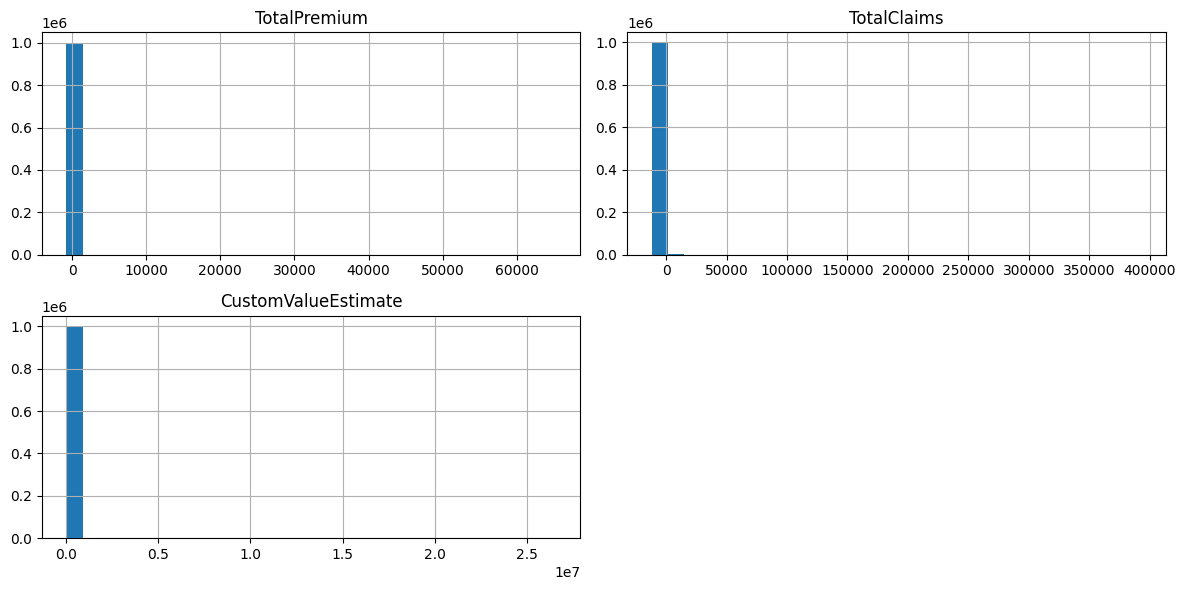

In [ ]:
num_vars = ["TotalPremium", "TotalClaims", "CustomValueEstimate"]
df[num_vars] = df[num_vars].apply(pd.to_numeric, errors='coerce')
df[num_vars].hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

## Bivariate/Multivariate Analysis

In [ ]:
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"] # Loss Ratio = TotalClaims / TotalPremium

### Boxplot of Loss Ratio by Province

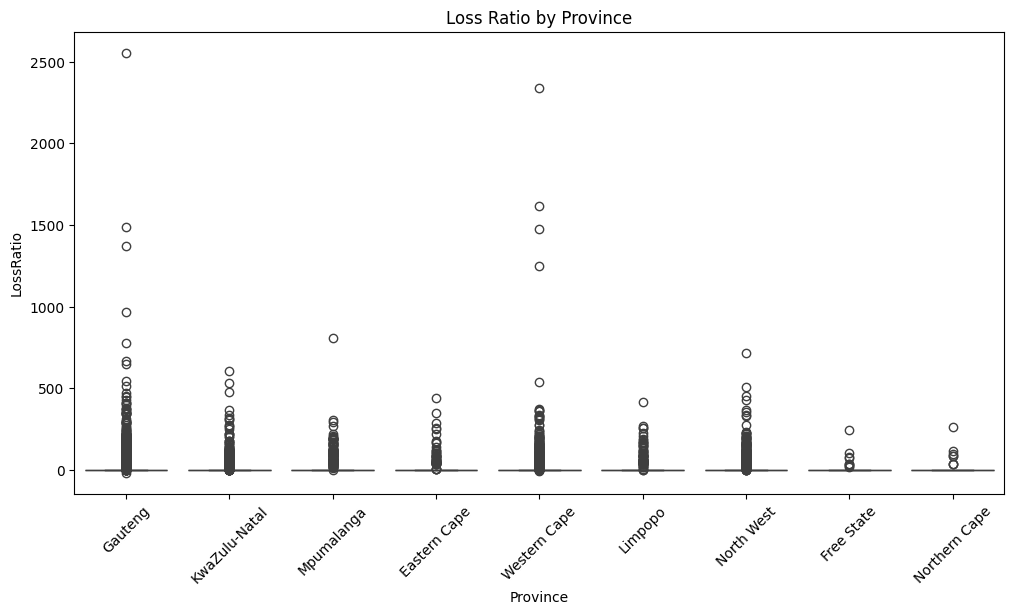

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Province", y="LossRatio")
plt.xticks(rotation=45)
plt.title("Loss Ratio by Province")
plt.show()

C:\Users\Bereket\AppData\Local\Temp\ipykernel_6344\223840971.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Gender", y="LossRatio", hue="VehicleType", ci=None)


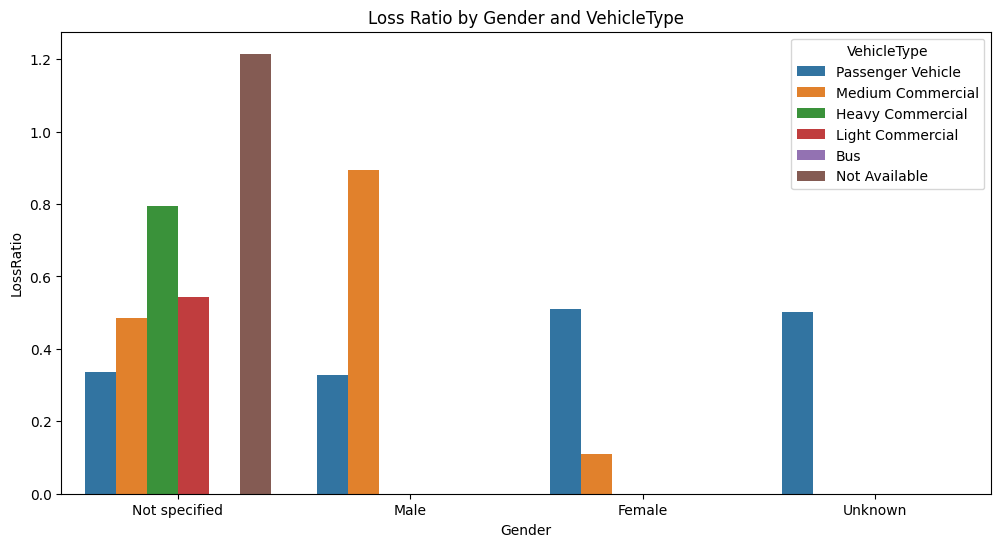

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Gender", y="LossRatio", hue="VehicleType", ci=None)
plt.title("Loss Ratio by Gender and VehicleType")
plt.show()

### Correlation heatmap for numerical columns

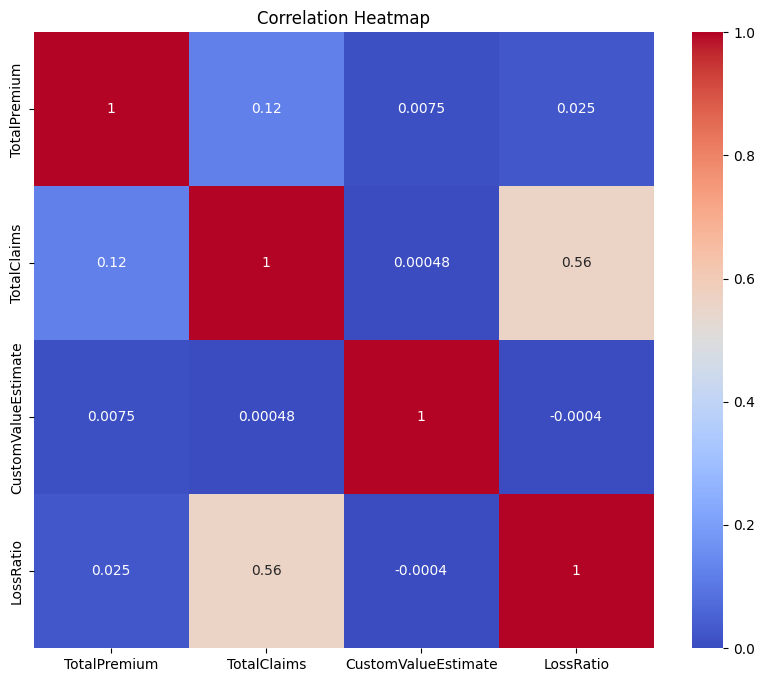

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_vars + ["LossRatio"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Temporal Trends

In [ ]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors='coerce')

<Figure size 1200x600 with 0 Axes>

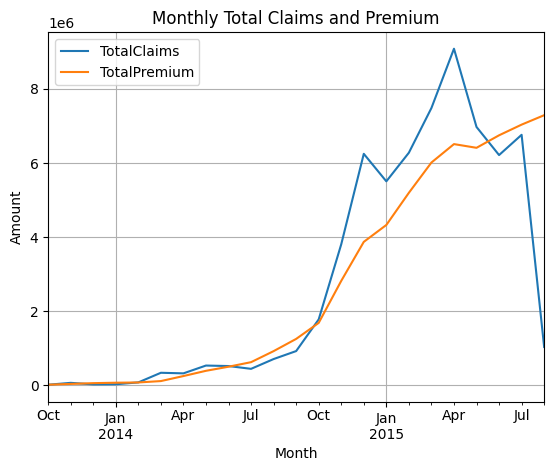

In [ ]:
df_monthly = df.groupby(df["TransactionMonth"].dt.to_period("M"))[["TotalClaims", "TotalPremium"]].sum()
df_monthly.index = df_monthly.index.to_timestamp()

plt.figure(figsize=(12, 6))
df_monthly.plot()
plt.title("Monthly Total Claims and Premium")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.grid(True)
plt.show()

## High Claim Vehicles

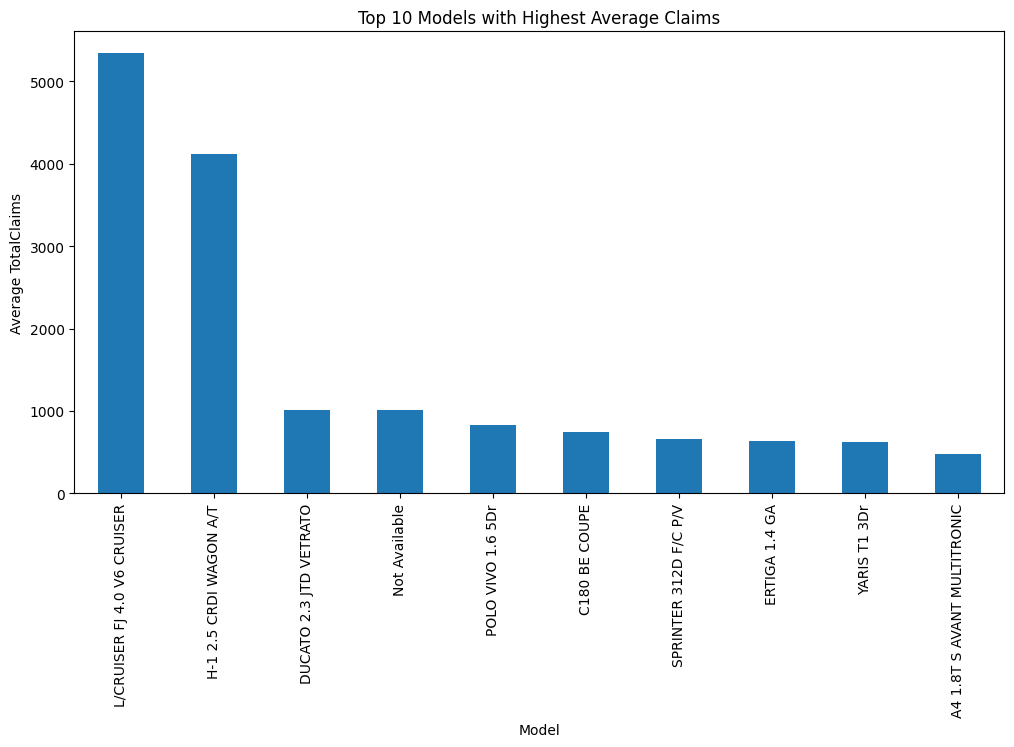

In [ ]:
top_models = df.groupby("Model")["TotalClaims"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_models.plot(kind="bar")
plt.title("Top 10 Models with Highest Average Claims")
plt.ylabel("Average TotalClaims")
plt.show()

## Outlier Detection

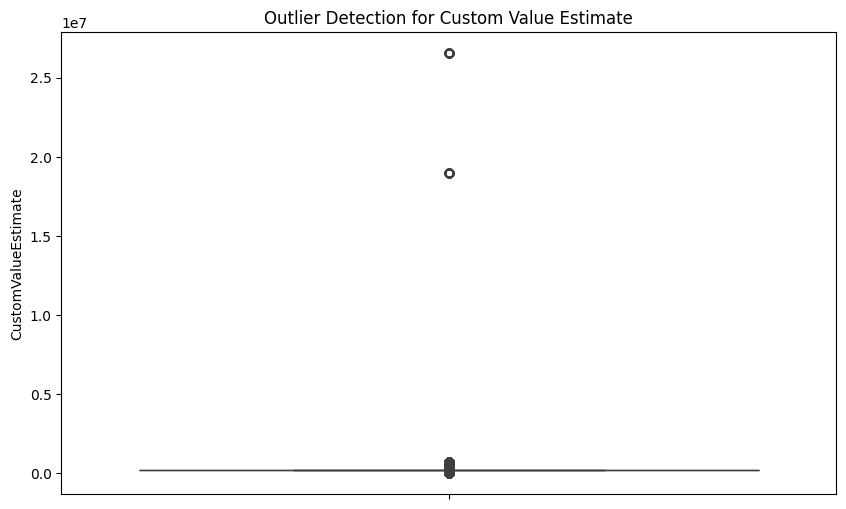

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y="CustomValueEstimate")
plt.title("Outlier Detection for Custom Value Estimate")
plt.show()

In [ ]:
# Save cleaned dataset
df.to_csv("../data/cleaned_ML_rating.csv", index=False)